In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pt 1: Análisis exploratorio

El dataset que estaremos utilizando proviene de [Kaggle](https://www.kaggle.com/datasets/ajinilpatel/energy-consumption-prediction/data) y contiene información sobre el consumo de energia por hora para varios hogares. El dataset contiene información sobre la fecha de las medidas, el clima, el tamaño del hogar, si tiene un sistema HVAC activado y si las luces estaban prendidas.
Empezaremos por viendo la distribución de las variables numericas. Estas son `Temperature`, `SquareFootage`, `Occupancy`, `RenewableEnergy` y `EnergyConsumption`. Esta ultima sera el objetivo de predicción en la parte dos de este trabajo.

Usando los metodos `.head()` y `.describe()` podemos empezar a ver la estructura de los datos en el dataset.

In [4]:
df = pd.read_csv('dataset.csv')
df.head()


,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [38]:
variablesNumericas = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']
df[variablesNumericas].describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


También sera util visualizar las distribuciones de estas variables

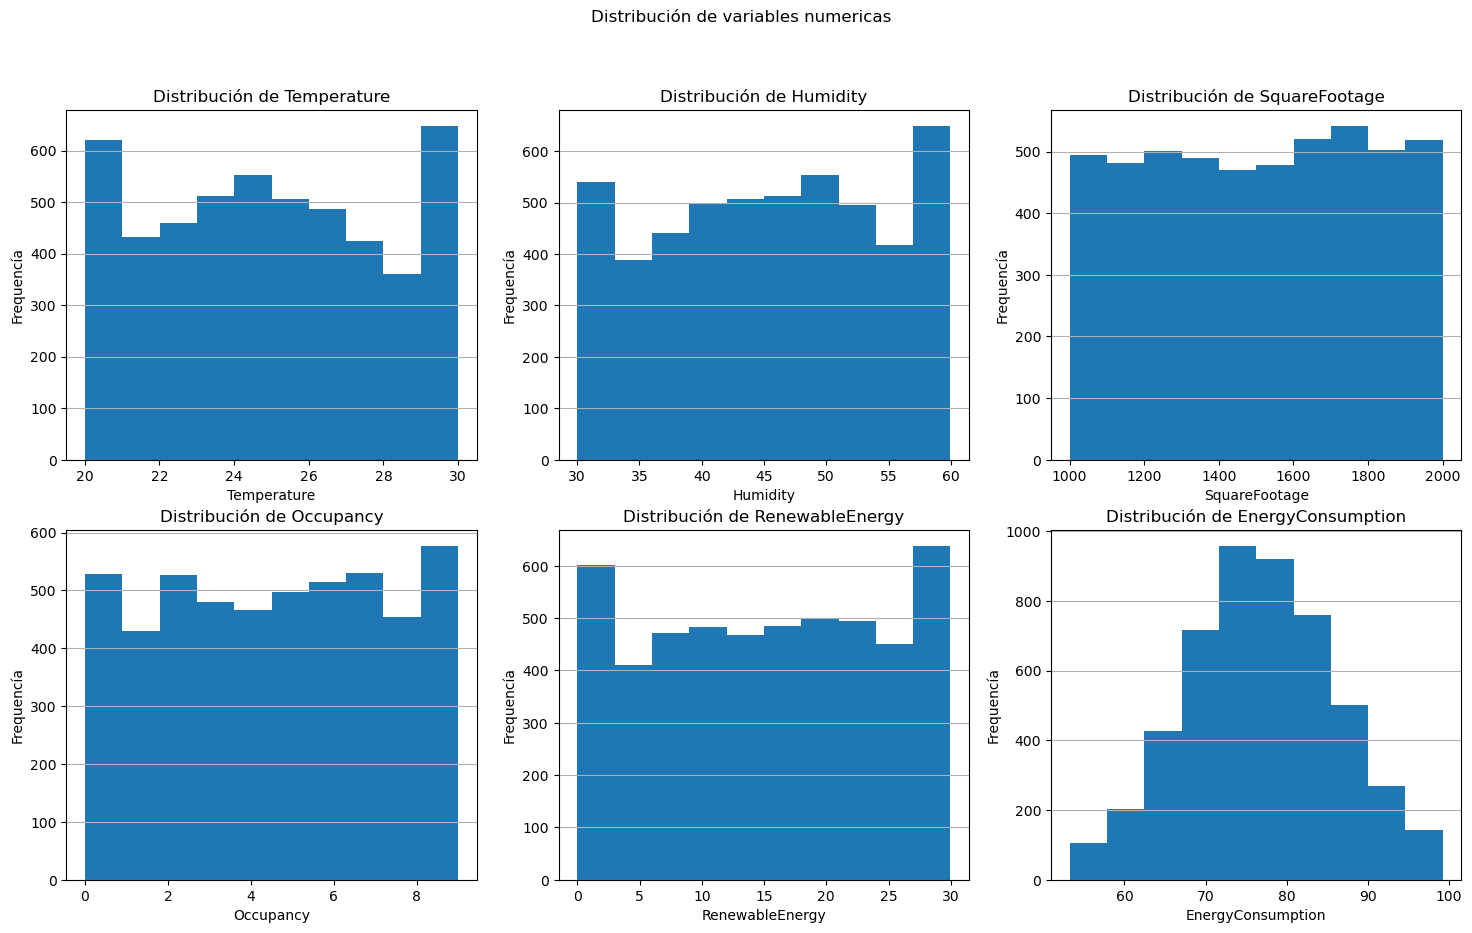

In [25]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 10))

ax = ax.ravel()
i = 0
for variable in variablesNumericas:
    ax[i].hist(df[variable])
    ax[i].set_title(f'Distribución de {variable}')
    ax[i].set_ylabel('Frequencía')
    ax[i].set_xlabel(variable)
    ax[i].grid(axis='y')
    #df[variable].plot(kind='hist', ax=ax[i])
    i += 1

fig.suptitle('Distribución de variables numericas')
plt.show()

También podemos visualizar las interacciones entre nuestras variables numericas. No consideraremos la variable `Occupancy` ya que no es continua. Observamos que aunque hay una relación entre las variables independientes y el consumo de energía. no hay ninguna relación aparente entre una variable independiente y otra.

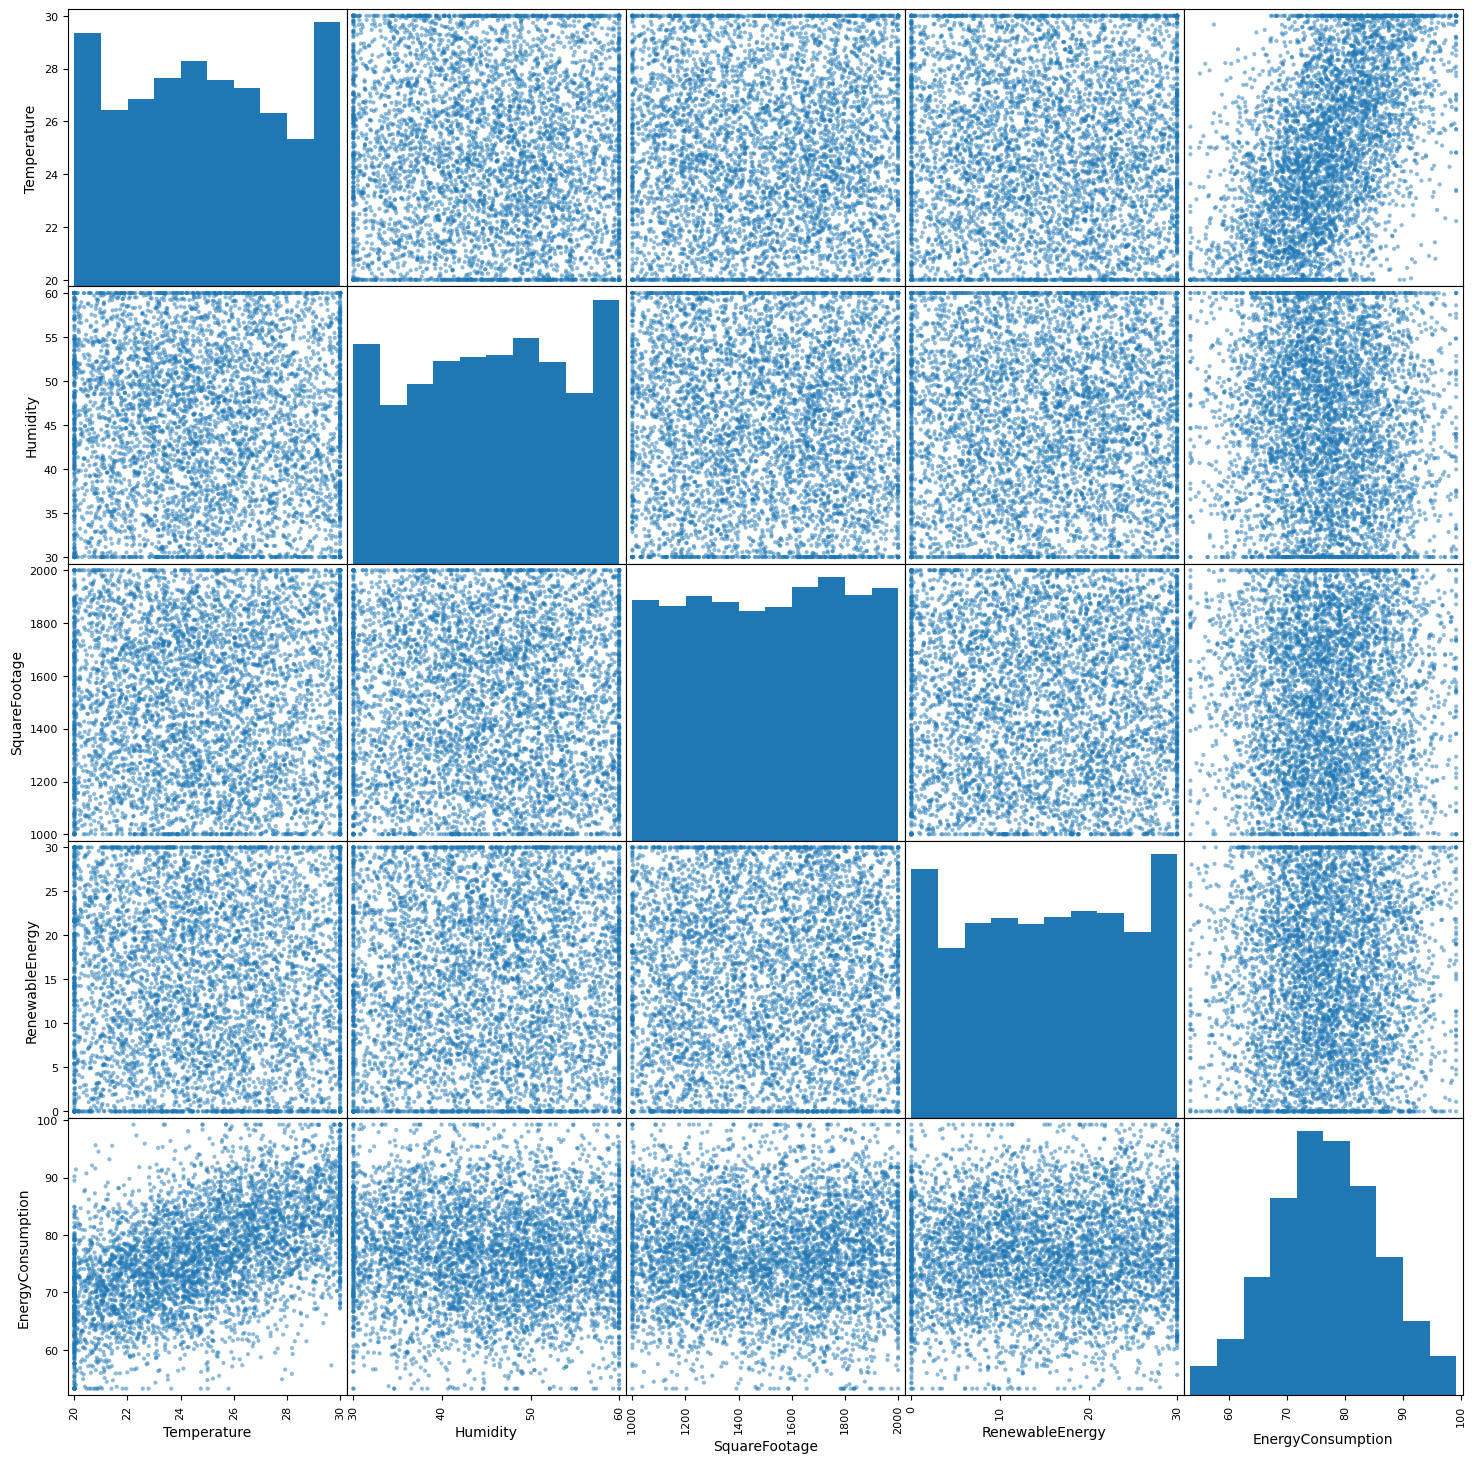

In [50]:
variablesNumericas2 = variablesNumericas.copy()
variablesNumericas2.remove('Occupancy')
fig = pd.plotting.scatter_matrix(df[variablesNumericas2], figsize=(18, 18));